### 6-9. 프로젝트 : 주식 예측에 도전해 보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statsmodels

In [2]:
# dataset_filepat = 'C:/Users/prokj/Documents/GitHub/aiffel/7week/data/005930.KS.csv'
dataset_filepat = 'C:/Users/prokj/Documents/GitHub/aiffel/7week/data/samsung_1year.csv'
stock_samsung_df = pd.read_csv(dataset_filepat) 
print(type(stock_samsung_df))
stock_samsung_df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-18,47950.0,49100.0,47600.0,48800.0,46788.835938,20481981
1,2020-05-19,50100.0,50500.0,49700.0,50300.0,48227.015625,25168295
2,2020-05-20,50000.0,50200.0,49800.0,50000.0,47939.382813,14896899
3,2020-05-21,50300.0,50400.0,49850.0,49950.0,47891.437500,14949266
4,2020-05-22,49600.0,49800.0,48600.0,48750.0,46740.894531,19706284


In [3]:
stock_samsung_df = pd.read_csv(dataset_filepat, index_col='Date', parse_dates=True)
stock_samsung_df.head()
# 날짜를 인덱스로 바꿈

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-18,47950.0,49100.0,47600.0,48800.0,46788.835938,20481981
2020-05-19,50100.0,50500.0,49700.0,50300.0,48227.015625,25168295
2020-05-20,50000.0,50200.0,49800.0,50000.0,47939.382813,14896899
2020-05-21,50300.0,50400.0,49850.0,49950.0,47891.437500,14949266
2020-05-22,49600.0,49800.0,48600.0,48750.0,46740.894531,19706284


In [4]:
# close 빼고 안쓸꺼니까 날려버리기

stock_samsung_df.drop(['Open','High','Low','Adj Close','Volume'] ,axis='columns', inplace=True)
stock_samsung_df

,Close
Date,
2020-05-18,48800.0
2020-05-19,50300.0
2020-05-20,50000.0
2020-05-21,49950.0
2020-05-22,48750.0
...,...
2021-05-12,80000.0
2021-05-13,78500.0
2021-05-14,80100.0


In [5]:
stock_samsung_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2020-05-18 to 2021-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   250 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [6]:
ts = stock_samsung_df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

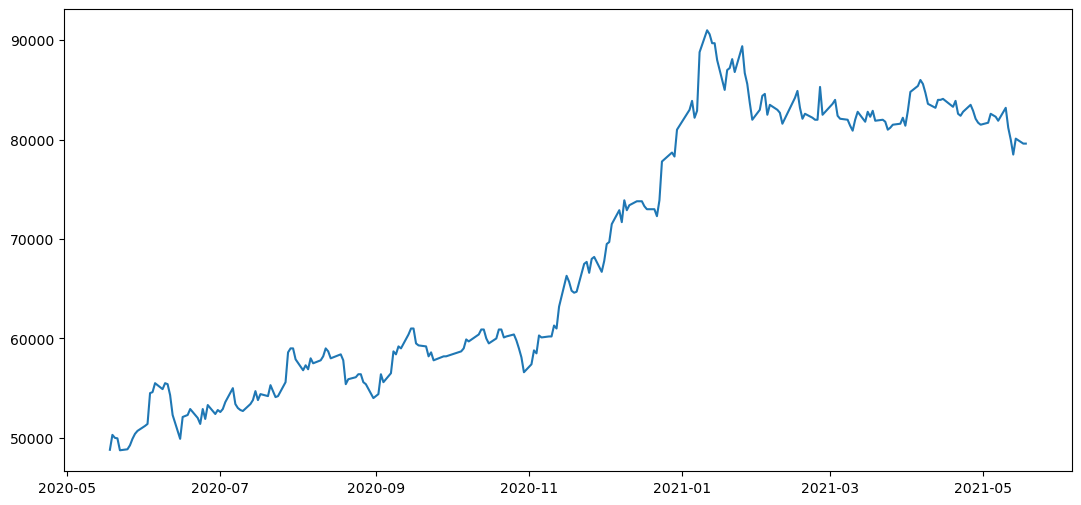

In [7]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13,6

plt.plot(ts)

#### STEP 2 : 각종 전처리 수행

In [8]:
# 결측치 처리
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)


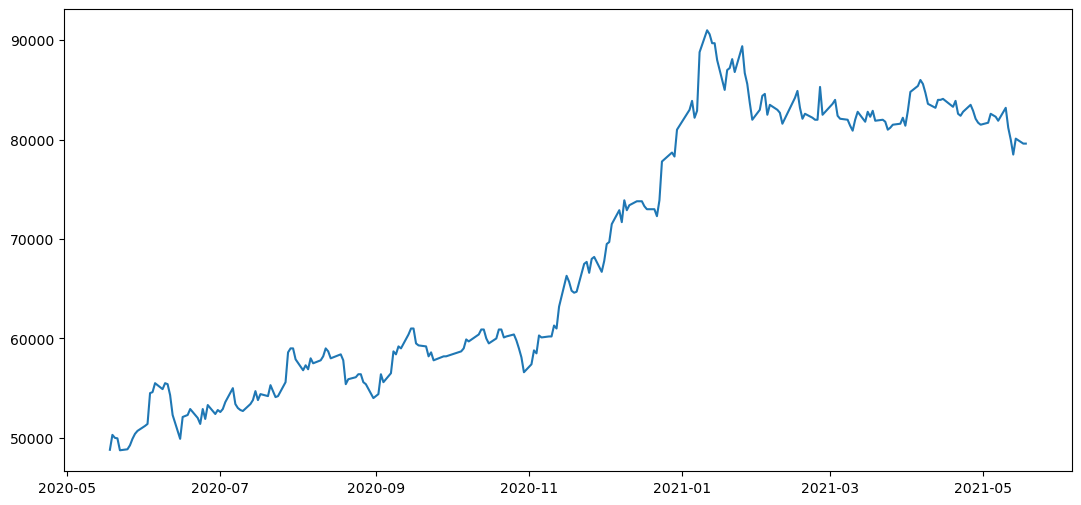

In [9]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts[ts.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts)

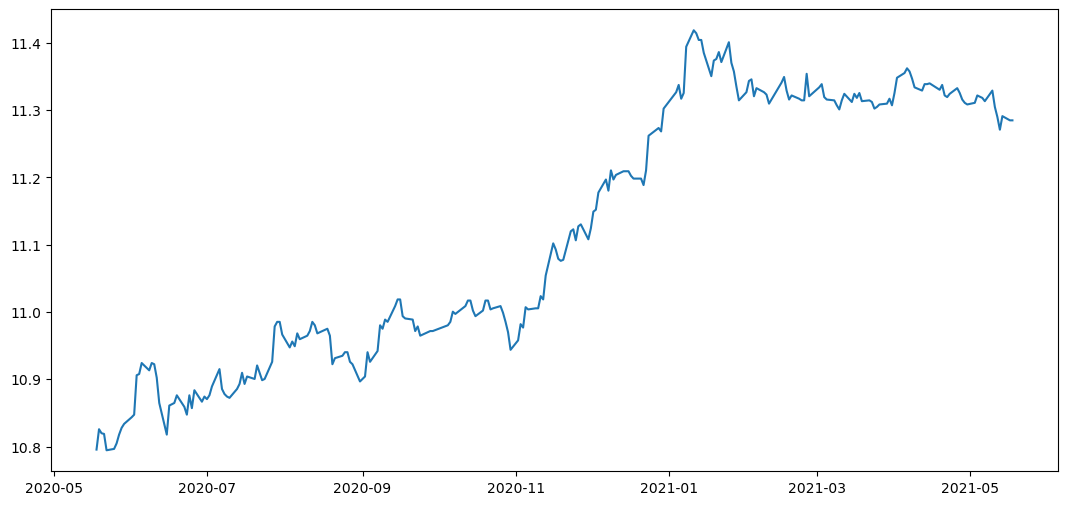

In [10]:
# 로그 변환
ts_log = np.log(ts)
plt.plot(ts_log)

#### STEP 3 : 시계열 안정성 분석

In [11]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [12]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

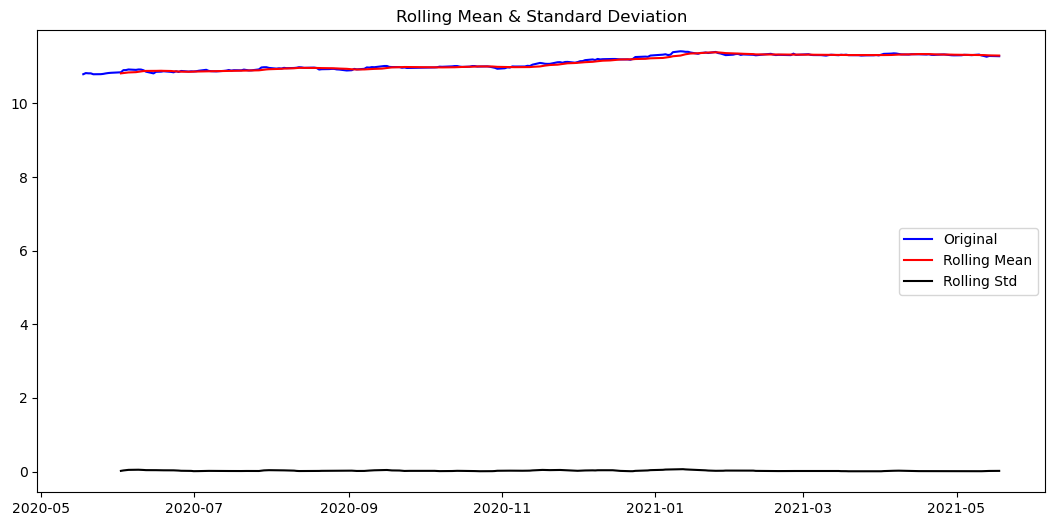

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


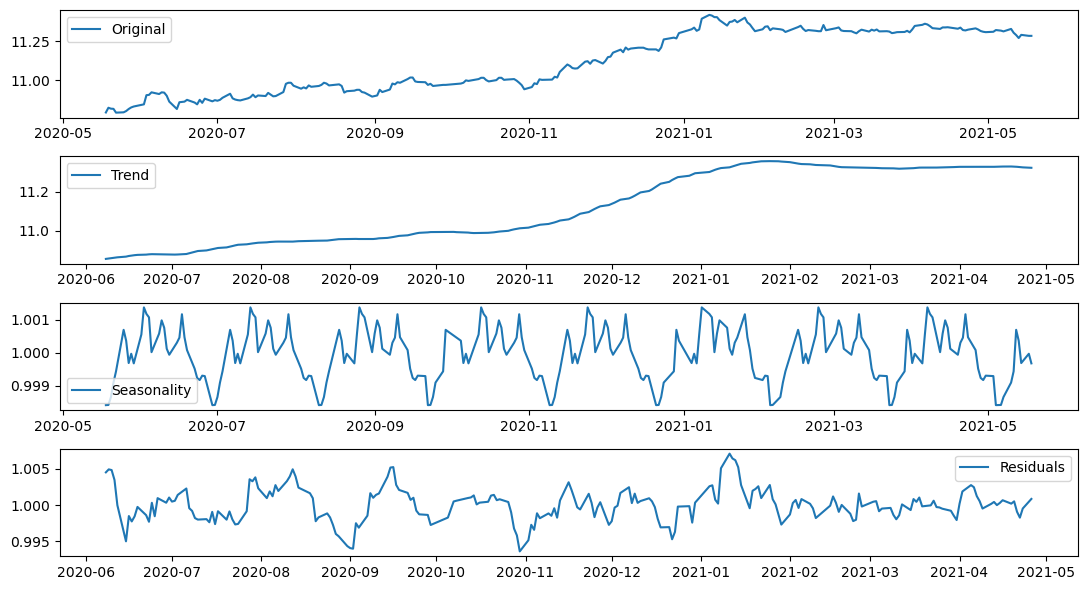

In [13]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

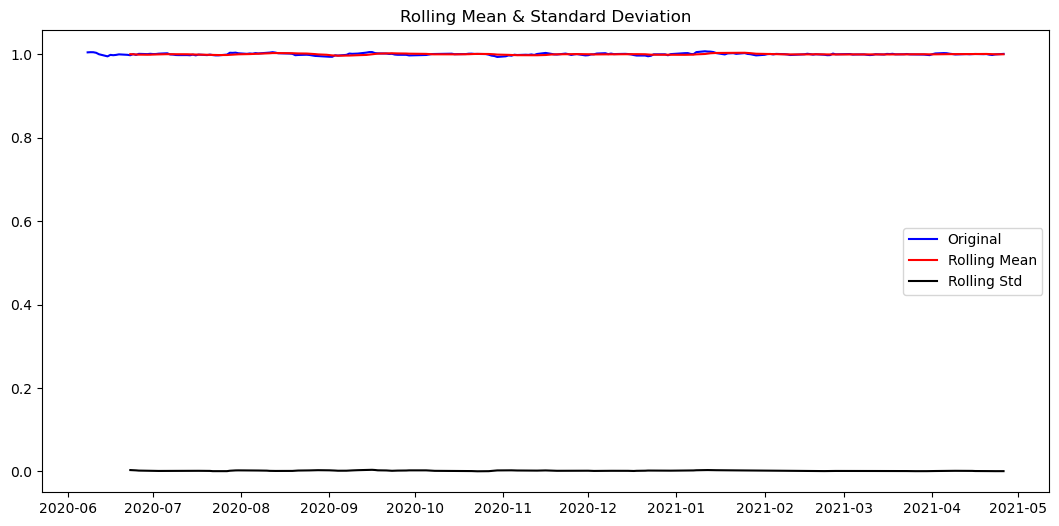

In [14]:
# Residual 안정성 확인
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [15]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


#### STEP 4 : 학습, 테스트 데이터셋 생성

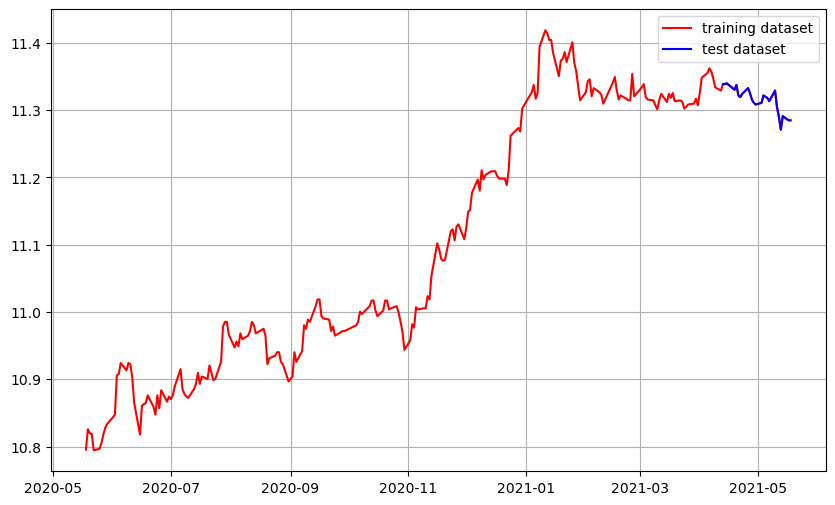

In [16]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [17]:
type(train_data)

pandas.core.series.Series

In [18]:
test_data

Date
2021-04-13    11.338572
2021-04-14    11.338572
2021-04-15    11.339762
2021-04-16    11.337381
2021-04-19    11.330204
2021-04-20    11.337381
2021-04-21    11.321765
2021-04-22    11.319341
2021-04-23    11.324183
2021-04-26    11.332602
2021-04-27    11.325390
2021-04-28    11.315693
2021-04-29    11.310809
2021-04-30    11.308358
2021-05-03    11.310809
2021-05-04    11.321765
2021-05-06    11.318126
2021-05-07    11.313254
2021-05-10    11.329003
2021-05-11    11.304671
2021-05-12    11.289782
2021-05-13    11.270854
2021-05-14    11.291031
2021-05-17    11.284769
2021-05-18    11.284769
Name: Close, dtype: float64

In [19]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2020-05-18    10.795486
2020-05-19    10.825760
Name: Close, dtype: float64
(225,)
(25,)


#### STEP 5 : 적정 ARIMA 모수 찾기

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


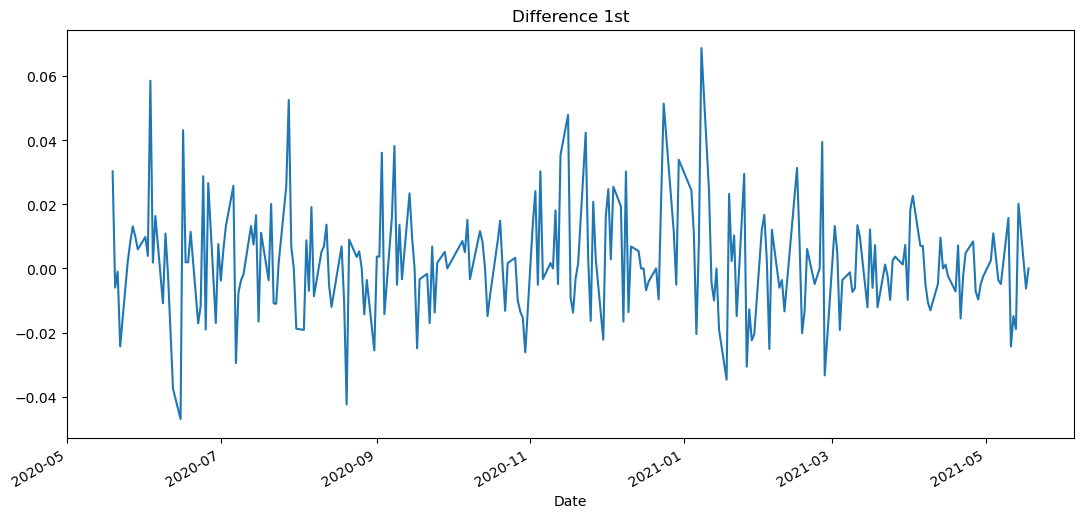

In [20]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [21]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 583.488
Date:                Thu, 05 Jan 2023   AIC                          -1162.976
Time:                        21:20:12   BIC                          -1156.153
Sample:                             0   HQIC                         -1160.222
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0333      0.061      0.545      0.586      -0.086       0.153
sigma2         0.0003   2.42e-05     13.219      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.06   Jarque-

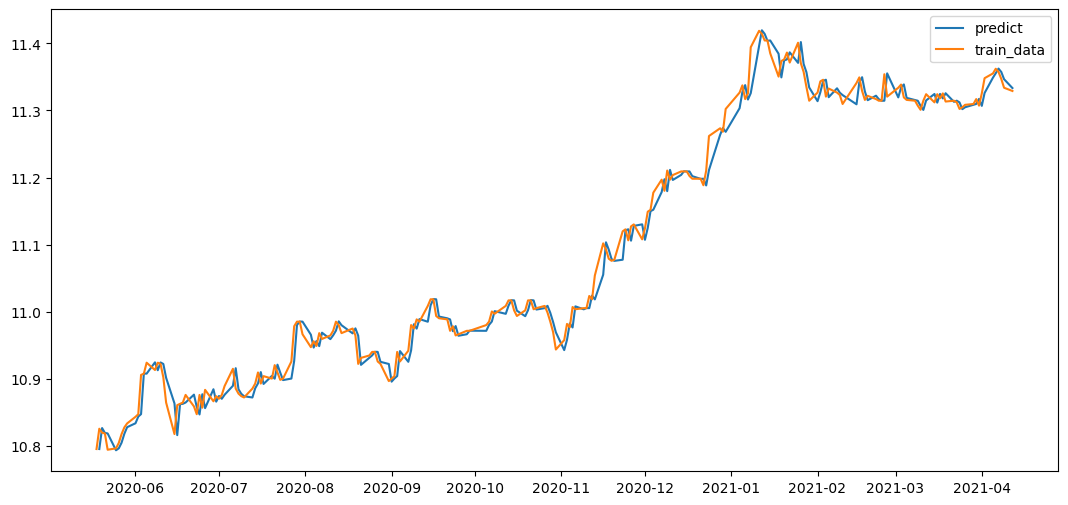

In [22]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

In [23]:
from pmdarima.arima import ndiffs
import pmdarima as pm

In [24]:
model = pm.auto_arima (fitted_m, d = 1, seasonal = False, trace = True)
model.fit(fitted_m)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1138.299, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1146.033, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1144.092, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1144.095, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1144.218, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1142.093, Time=0.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.933 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [25]:
model = pm.auto_arima (fitted_m, d = 2, seasonal = False, trace = True)
model.fit(fitted_m)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-984.038, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1043.405, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-986.025, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-1064.288, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-1079.831, Time=0.06 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-1086.667, Time=0.18 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-1090.635, Time=0.13 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-1112.789, Time=0.60 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-1119.637, Time=0.60 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-1122.012, Time=0.48 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-1118.361, Time=0.24 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-1123.619, Time=0.52 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept

ARIMA(order=(3, 2, 2), scoring_args={}, suppress_warnings=True)

In [26]:
fitted_m

Date
2020-05-19    10.795486
2020-05-20    10.826768
2020-05-21    10.819579
2020-05-22    10.818744
2020-05-25    10.793651
                ...    
2021-04-06    11.355336
2021-04-07    11.362336
2021-04-08    11.357285
2021-04-09    11.346519
2021-04-12    11.333364
Name: predicted_mean, Length: 224, dtype: float64

In [27]:
len(test_data)

25

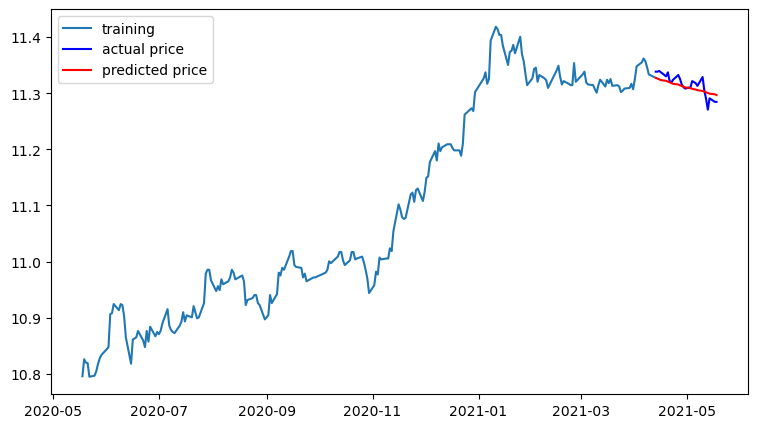

In [28]:
model = ARIMA(train_data, order=(2, 0, 1))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc.index = test_data.index

# Make as pandas series
fc_series = pd.Series(data = fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [29]:
fc_series

Date
2021-04-13    11.327597
2021-04-14    11.326243
2021-04-15    11.324887
2021-04-16    11.323541
2021-04-19    11.322203
2021-04-20    11.320872
2021-04-21    11.319548
2021-04-22    11.318233
2021-04-23    11.316924
2021-04-26    11.315623
2021-04-27    11.314330
2021-04-28    11.313044
2021-04-29    11.311766
2021-04-30    11.310494
2021-05-03    11.309230
2021-05-04    11.307974
2021-05-06    11.306724
2021-05-07    11.305482
2021-05-10    11.304246
2021-05-11    11.303018
2021-05-12    11.301797
2021-05-13    11.300583
2021-05-14    11.299375
2021-05-17    11.298175
2021-05-18    11.296981
Name: predicted_mean, dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

# 3509600
# 2773512

MSE:  1048973.6014241127
MAE:  843.7579531511088
RMSE:  1024.1941229201195
MAPE: 1.03%
